Lane coloration has become popular in real time vehicular ad-hoc networks (VANETs). The main emphasis of this paper is to find the further ways which can be used further to improve the result of lane detection algorithms. Noise, visibility etc. can reduce the performance or the existing lane detection algorithms. The methods developed so far are working efficiently and giving good results in case when noise is not present in the images. But problem is that they fail or not give efficient results when there is any kind of noise or fog in the road images. The noise can be anything like dust, shadows, puddles, oil stains, tire skid marks, etc.

In [1]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import cv2 as cv

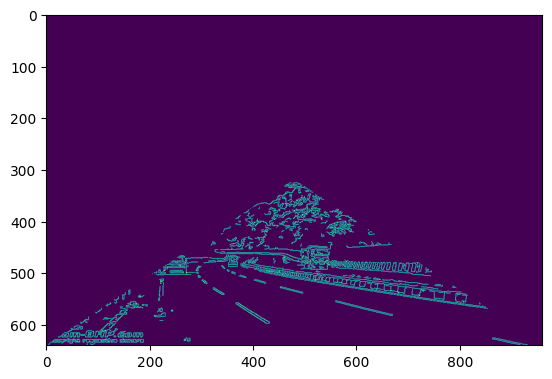

In [2]:
import cv2
import numpy as np
import  matplotlib.pylab as plt
image=cv2.imread('lane3.jpeg')
height=image.shape[0]
width=image.shape[1]
img=np.copy(image)
def region_of_interst(img,vertices):
    mask = np.zeros_like(img)
    #channel_count = img.shape[2]
    match_mask_color = 255
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image
region_of_interest_vertices = [
    (0, height),
    (width / 2, height / 2),
    (width, height),]
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
canny=cv2.Canny(gray,100,200)
cropped_image = region_of_interst(canny,np.array([region_of_interest_vertices],np.int32))
plt.imshow(cropped_image)


# Edge detection
Different edge detection is applied

1. Laplacian edge detection
2. Sobel method
3. Canny edge detection

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [4]:
# read the image
img1 = cv2.imread('lane.jpeg',0)

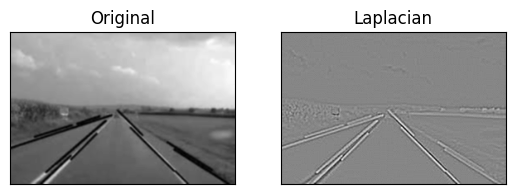

In [5]:
# remove noise
img = cv2.GaussianBlur(img1,(3,3),0)


# convolute with proper kernels
laplacian = cv2.Laplacian(img,cv2.CV_64F)


plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])

plt.show()

In [6]:
# Create a custom kernel

# 3x3 array for edge detection
sobel_y = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])

## TODO: Create and apply a Sobel x operator
sobel_x = np.array([[-1,0,1],
                    [ -2, 0 , 2],
                    [ -1,0,1]])

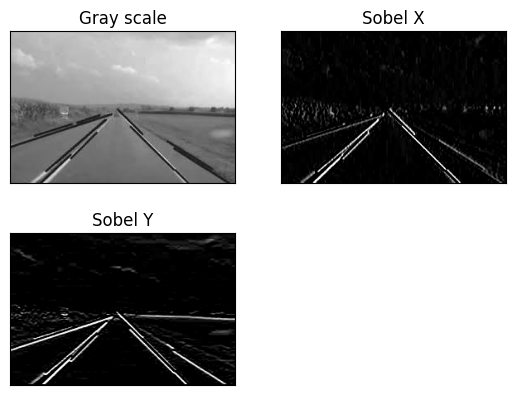

In [7]:
# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)  
filtered_image_y = cv2.filter2D(img1, -1, sobel_y)
filtered_image_x = cv2.filter2D(img1, -1, sobel_x)

plt.subplot(2,2,1),plt.imshow(img1,cmap = 'gray')
plt.title('Gray scale'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(filtered_image_x,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(filtered_image_y,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()

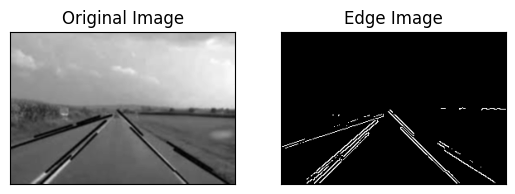

In [8]:
# canny edge detection

edges = cv2.Canny(img,250,250)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([]);
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([]);